pca_data.shape=(230, 230)
expression_data.shape=(230, 39280)
expression_data.iloc[:, 0] =GSM1090501    0.0276
GSM1090502   -0.0205
GSM1090503    0.1120
GSM1090504   -0.0816
GSM1090505   -0.0517
               ...  
GSM1090726    0.0740
GSM1090727    0.0766
GSM1090728    0.0326
GSM1090729    0.2280
GSM1090730    0.1320
Name: 10019475365, Length: 230, dtype: float64


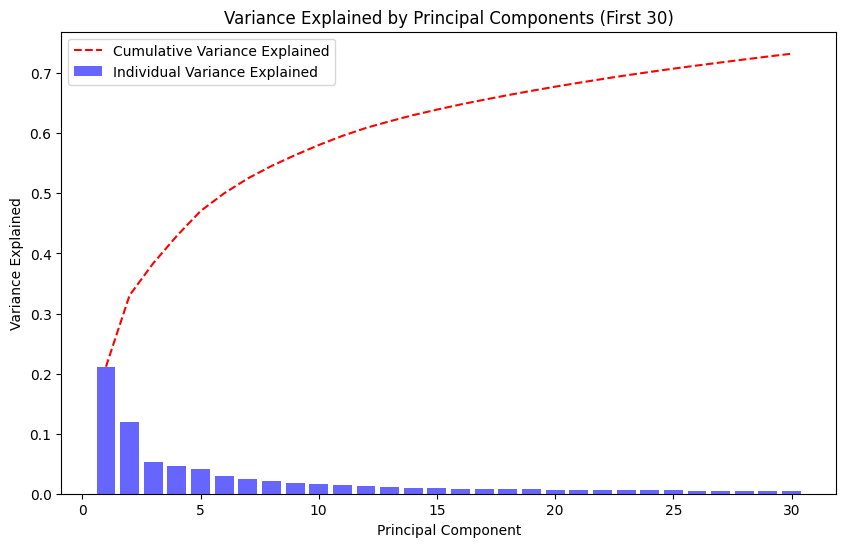

pca_components_df.shape=(230, 39280)


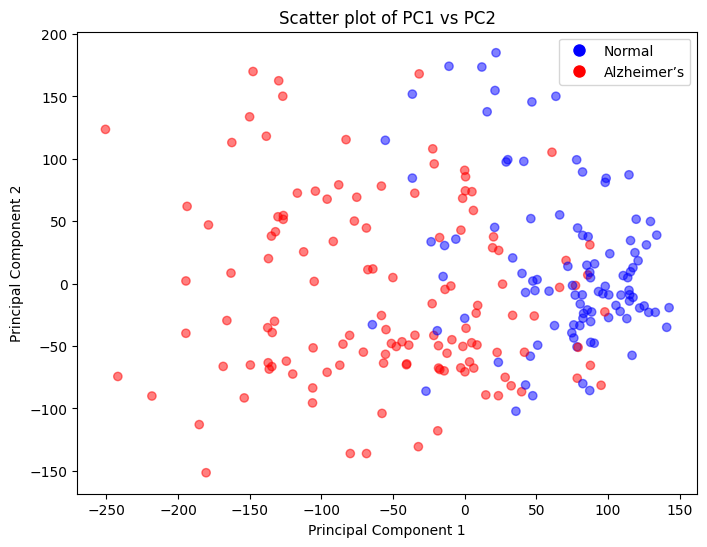

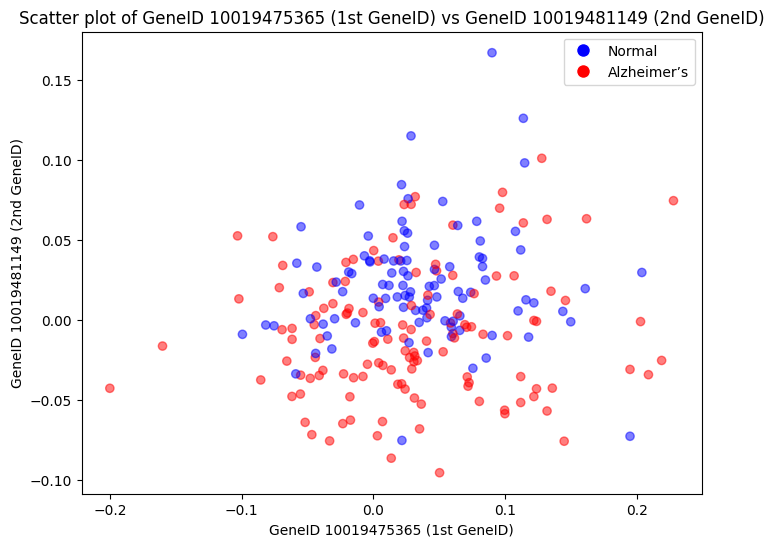

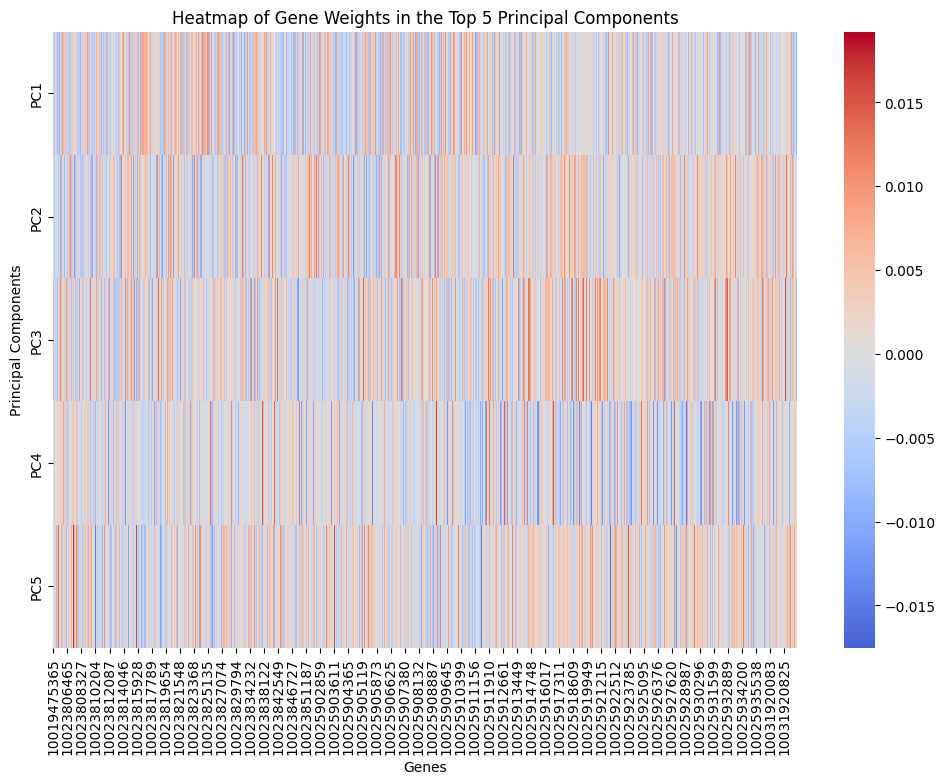

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the data
expression_data = pd.read_csv('data/braindat.csv', index_col=0)  # Gene expression data
expression_data = expression_data.T  # Transpose data so that each row is a patient and each col is a gene
sample_descriptions = pd.read_csv('data/brain_sample_descriptions_PFC.csv')  # Labels (Each row is a paitent)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(expression_data)

# Perform PCA
pca = PCA()
#pca = PCA(n_components=40)

pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
print(f"{pca_data.shape=}")
print(f"{expression_data.shape=}")
print(f"{expression_data.iloc[:, 0] =}")


# Variance explained by each component
variance_explained = pca.explained_variance_ratio_

# Plot proportion of variance explained by each component
plt.figure(figsize=(10, 6))
plt.bar(range(1, 31), variance_explained[:30], alpha=0.6, color='b', label='Individual Variance Explained')
plt.plot(range(1, 31), np.cumsum(variance_explained[:30]), 'r--', label='Cumulative Variance Explained')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Principal Components (First 30)')
plt.legend()
plt.show()

# Save the PCA components to a CSV file
pca_components_df = pd.DataFrame(pca.components_, index=[f'PC{i+1}' for i in range(len(pca.components_))], columns=expression_data.columns)
pca_components_df.index.name = 'PC'
pca_components_df.to_csv('data/pca_components.csv')

print(f"{pca_components_df.shape=}")

# Save the pca transformed dataset
braindat_pca_transformed = pd.DataFrame(pca_data.T, index=[f'PC{i+1}' for i in range(len(pca.components_))], columns=expression_data.index)
braindat_pca_transformed.index.name = 'PC'
braindat_pca_transformed.to_csv('data/braindat_pca_transformed.csv')

# Scatter plot of first two principal components, colored by condition
plt.figure(figsize=(8, 6))
conditions = sample_descriptions['Disease']  # 'N' and 'A' labels
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=conditions.map({'N': 'blue', 'A': 'red'}), alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter plot of PC1 vs PC2')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Normal', markersize=10, markerfacecolor='blue'),
                    plt.Line2D([0], [0], marker='o', color='w', label='Alzheimer’s', markersize=10, markerfacecolor='red')])
plt.show()

# Scatter plot of first two GeneIDs, colored by condition
plt.figure(figsize=(8, 6))
conditions = sample_descriptions['Disease']  # 'N' and 'A' labels
plt.scatter(expression_data.iloc[:, 0], expression_data.iloc[:, 1], c=conditions.map({'N': 'blue', 'A': 'red'}), alpha=0.5)
plt.xlabel('GeneID 10019475365 (1st GeneID)')
plt.ylabel('GeneID 10019481149 (2nd GeneID)')
plt.title('Scatter plot of GeneID 10019475365 (1st GeneID) vs GeneID 10019481149 (2nd GeneID)')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Normal', markersize=10, markerfacecolor='blue'),
                    plt.Line2D([0], [0], marker='o', color='w', label='Alzheimer’s', markersize=10, markerfacecolor='red')])
plt.show()

# Correlation heatmap of genes with top principal components
import seaborn as sns
plt.figure(figsize=(12, 8))
top_pc_genes = pca_components_df.iloc[:5, :]  # Taking the first 5 PCs for correlation heatmap
sns.heatmap(top_pc_genes, cmap='coolwarm', center=0)
plt.title('Heatmap of Gene Weights in the Top 5 Principal Components')
plt.xlabel('Genes')
plt.ylabel('Principal Components')
plt.show()


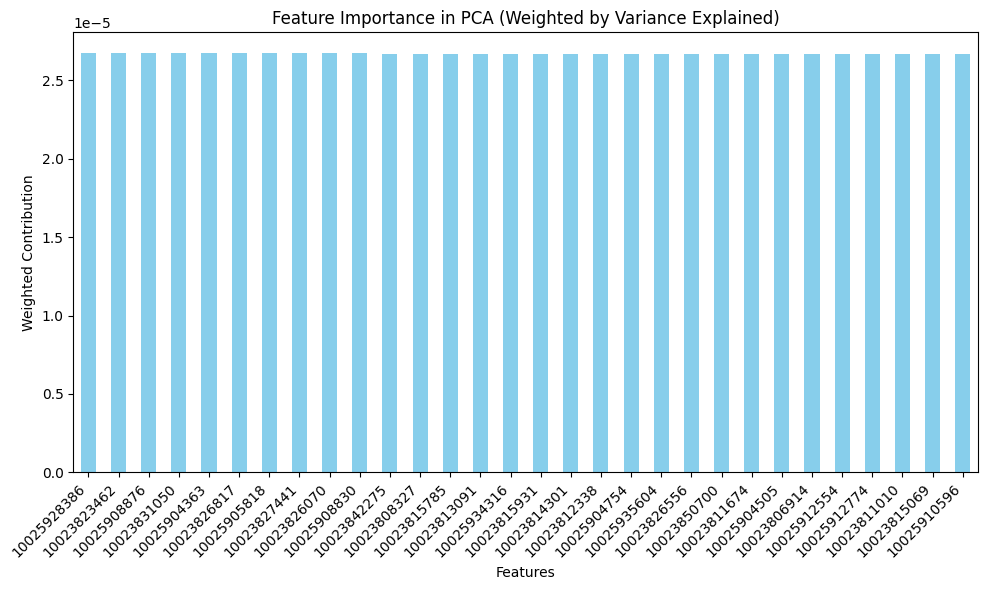

GeneID
10025928386    0.000027
10023823462    0.000027
10025908876    0.000027
10023831050    0.000027
10025904363    0.000027
10023826817    0.000027
10025905818    0.000027
10023827441    0.000027
10023826070    0.000027
10025908830    0.000027
10023842275    0.000027
10023808327    0.000027
10023815785    0.000027
10023813091    0.000027
10025934316    0.000027
10023815931    0.000027
10023814301    0.000027
10023812338    0.000027
10025904754    0.000027
10025935604    0.000027
10023826556    0.000027
10023850700    0.000027
10023811674    0.000027
10025904505    0.000027
10023806914    0.000027
10025912554    0.000027
10025912774    0.000027
10023811010    0.000027
10023815069    0.000027
10025910596    0.000027
dtype: float64


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('data/braindat.csv', index_col=0).T  # Gene expression data


# Assuming 'data' is your DataFrame with the original features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

pca = PCA(n_components=0.95)
pca.fit(scaled_data)

# Loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(pca.components_))], index=data.columns)
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate weighted sum of squared loadings for each feature
feature_importance = (loadings**2).dot(explained_variance_ratio)
feature_importance = feature_importance / feature_importance.sum()  # Normalize to make contributions sum to 1 if needed

# Sort by importance
feature_importance = feature_importance.sort_values(ascending=False).head(30)

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar', color='skyblue')
plt.title('Feature Importance in PCA (Weighted by Variance Explained)')
plt.xlabel('Features')
plt.ylabel('Weighted Contribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(feature_importance)
